In [10]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random

print(tf.__version__)

1.12.0


In [2]:
def read_fashion_mnist_dataset():
    fashion_mnist = keras.datasets.fashion_mnist
    (train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
    train_images = train_images / 255.0
    test_images = test_images / 255.0
    class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
    dataset_description = (train_images, train_labels), (test_images, test_labels), class_names
    return dataset_description

In [3]:
def visualise_fashion_mnist_dataset():
    plt.figure(figsize=(10,10))
    for i in range(25):
        plt.subplot(5,5,i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(train_images[i], cmap=plt.cm.binary)
        plt.xlabel(class_names[train_labels[i]])

In [4]:
def build_model(input_shape, network_layers, tf_activation_funcs, tf_optimizer, tf_loss, tf_metrics):
    assert(len(network_layers) == len(tf_activation_funcs))
    
    model = keras.Sequential()
    
    model.add(keras.layers.Flatten(input_shape=input_shape))
    
    for i in range(len(network_layers)):
        model.add(keras.layers.Dense(network_layers[i], activation=tf_activation_funcs[i]))

    model.compile(optimizer=tf_optimizer, loss=tf_loss, metrics=tf_metrics)
    
    return model

In [5]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  
  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'
  
  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks(range(10), class_names, rotation=45)
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1]) 
  predicted_label = np.argmax(predictions_array)
 
  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')


In [6]:
def plot_random_predictions(test_images, test_labels, predictions):
    index = random.randint(0, test_images.shape[0] - 1)
    plt.figure(figsize=(12,6))
    plt.subplot(1,2,1)
    plot_image(index, predictions, test_labels, test_images)
    plt.subplot(1,2,2)
    plot_value_array(index, predictions, test_labels)

In [40]:
def plot_train_val_curve(hist):
    train_loss = hist['loss'].values
    val_loss = hist['val_loss'].values
    plt.figure(figsize=(12,6))
    plt.xlabel("epochs")
    plt.ylabel("loss")
    plt.plot(train_loss, label="train loss")
    plt.plot(val_loss, label="val loss")
    plt.legend()

In [44]:
dataset_description = read_fashion_mnist_dataset()
(train_images, train_labels), (test_images, test_labels), class_names = dataset_description

print("Train Shape: " + str(train_images.shape))
print("Train label Shape: " + str(train_labels.shape))
print("Test Shape: " + str(test_images.shape))
print("Test label Shape: " + str(test_labels.shape))

# visualise_fashion_mnist_dataset()

input_shape = (train_images.shape[1], train_images.shape[2])
network_layers = [30, 7, 10]
tf_activation_funcs = ['relu', 'relu', 'softmax']
tf_optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.01)
tf_loss = 'sparse_categorical_crossentropy'
tf_metrics = ['accuracy']
num_epochs = 40
val_split = 0.5

model = build_model(input_shape, network_layers, tf_activation_funcs, tf_optimizer, tf_loss, tf_metrics)

history = model.fit(train_images, train_labels, epochs=num_epochs, validation_split=val_split)

test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Test accuracy:', test_acc)
print('Test loss:', test_loss)

predictions = model.predict(test_images)

Train Shape: (60000, 28, 28)
Train label Shape: (60000,)
Test Shape: (10000, 28, 28)
Test label Shape: (10000,)
Train on 30000 samples, validate on 30000 samples
Epoch 1/40
30000/30000 [==============================] - 2s 57us/step - loss: 1.3806 - acc: 0.5258 - val_loss: 0.8235 - val_acc: 0.7188
Epoch 2/40
30000/30000 [==============================] - 1s 45us/step - loss: 0.7097 - acc: 0.7496 - val_loss: 0.6401 - val_acc: 0.7813
Epoch 3/40
30000/30000 [==============================] - 1s 47us/step - loss: 0.6033 - acc: 0.7905 - val_loss: 0.5839 - val_acc: 0.8010
Epoch 4/40
30000/30000 [==============================] - 1s 46us/step - loss: 0.5596 - acc: 0.8043 - val_loss: 0.5605 - val_acc: 0.8073
Epoch 5/40
30000/30000 [==============================] - 1s 46us/step - loss: 0.5325 - acc: 0.8133 - val_loss: 0.5209 - val_acc: 0.8234
Epoch 6/40
30000/30000 [==============================] - 1s 46us/step - loss: 0.5136 - acc: 0.8203 - val_loss: 0.5789 - val_acc: 0.7866
Epoch 7/40
30000

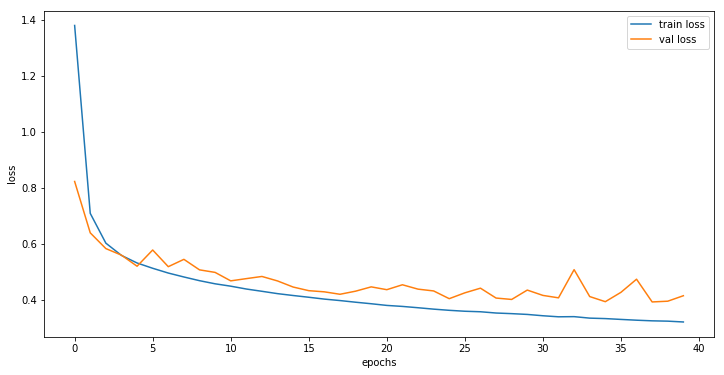

In [45]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
plot_train_val_curve(hist)

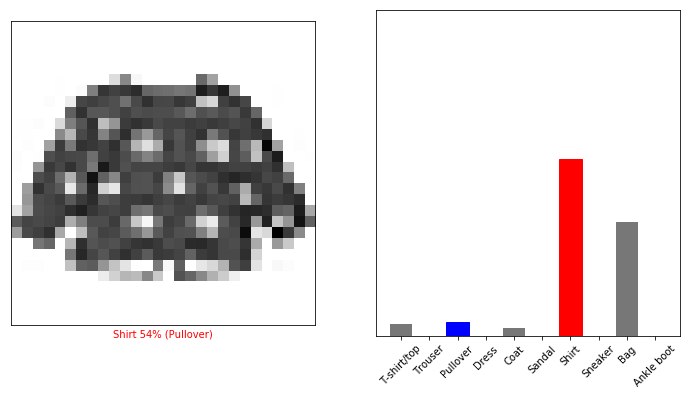

In [94]:
plot_random_predictions(test_images, test_labels, predictions)